## DTMF Project Part 2: Encoding digits into DTMF sound files and creating your data base

In [1]:
# Import libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import random
import statistics
from statistics import stdev
from collections import Counter
from scipy.io import wavfile

Note: (please read) 
 - I have given some long comments in the cells. Make sure you read them by scrolling horizontally.
 - I have defined a variable called 'size' at the begening of task 5. It is the key variable that will determine the number of 
   entries (which is supposed to be 10000). I have kept it at 100 so that the code runs smoothly, without any problem. Feel 
   free to change it to whatever value you want. Keep in mind that the laptop may hang or even crash at 10000 so I 
   would suggest keeping it below 500. But it's upto you. 
 - Note that we had used 10 instead of * and 11 instead of # to avoid errors. So later on in the notebook when checkong the 
   digits * and 10 mean the same thing, the same is for # and 11
 - The size determined in this part of the project will affect the size in the part 3 of the project, so when changing the          size, run this whole file again before running part again.

### Objective
In this first part of the project you are encoding the keypad digits into DTMF sound files and are creating your data base


**DTMF encoding:** Each keypad digit is encoded using two frequencies. The frequencies are chosen in such a way that they typically do not occur together naturally and thus will not be created accidentally. The phase shifts for each signal is chosen randomly.

$$ y(t)= A\cdot \cos(2\pi f_1 t+\phi_1) + A\cdot \cos(2\pi f_2 t+\phi_2)$$

The frequencies $f_1$ and $f_2$ are determined by the position of the digit on the keypad and are shown below, where $f_1$ is determined by the row and $f_2$ by the column of the position. 

![](https://ptolemy.berkeley.edu/eecs20/week2/keypad.gif)

This row-column assignment of frequencies allows the use of a frequency for several keys and thereby reduces cost.

### Tasks (20 points)

#### Task-1 (3 points)
For each of the digits 0 - 9 and the * and # key, create 1 second of the corresponding sound signal. For the phase shifts, you need to pick a random value from the variable `all_phi` given below. Store each signal as a separate wav-file and listen to it.

In [2]:
A = 0.4 # amplitude
all_phi = np.arange(0,2*np.pi,np.pi/1000) # phase shift

fs=8000;
B=16;

t=np.arange(0,1,1/fs) # discretized time (1 second duration)

f1 = [697, 770, 852, 941] # list of f1 frequencies
f2 = [1209, 1336, 1477] # list of f1 frequencies

# Complete task-1 here (you do not have to submit the sound files)

# discretized signal y(t)
y1=A*np.cos(2*np.pi*f1[0]*t+np.random.choice(all_phi)) + A*np.cos(2*np.pi*f2[0]*t+np.random.choice(all_phi))
y2=A*np.cos(2*np.pi*f1[0]*t+np.random.choice(all_phi)) + A*np.cos(2*np.pi*f2[1]*t+np.random.choice(all_phi))
y3=A*np.cos(2*np.pi*f1[0]*t+np.random.choice(all_phi)) + A*np.cos(2*np.pi*f2[2]*t+np.random.choice(all_phi))
y4=A*np.cos(2*np.pi*f1[1]*t+np.random.choice(all_phi)) + A*np.cos(2*np.pi*f2[0]*t+np.random.choice(all_phi))
y5=A*np.cos(2*np.pi*f1[1]*t+np.random.choice(all_phi)) + A*np.cos(2*np.pi*f2[1]*t+np.random.choice(all_phi))
y6=A*np.cos(2*np.pi*f1[1]*t+np.random.choice(all_phi)) + A*np.cos(2*np.pi*f2[2]*t+np.random.choice(all_phi))
y7=A*np.cos(2*np.pi*f1[2]*t+np.random.choice(all_phi)) + A*np.cos(2*np.pi*f2[0]*t+np.random.choice(all_phi))
y8=A*np.cos(2*np.pi*f1[2]*t+np.random.choice(all_phi)) + A*np.cos(2*np.pi*f2[1]*t+np.random.choice(all_phi))
y9=A*np.cos(2*np.pi*f1[2]*t+np.random.choice(all_phi)) + A*np.cos(2*np.pi*f2[2]*t+np.random.choice(all_phi))
ys=A*np.cos(2*np.pi*f1[3]*t+np.random.choice(all_phi)) + A*np.cos(2*np.pi*f2[0]*t+np.random.choice(all_phi))
y0=A*np.cos(2*np.pi*f1[3]*t+np.random.choice(all_phi)) + A*np.cos(2*np.pi*f2[1]*t+np.random.choice(all_phi))
yh=A*np.cos(2*np.pi*f1[3]*t+np.random.choice(all_phi)) + A*np.cos(2*np.pi*f2[2]*t+np.random.choice(all_phi))

wavfile.write("0.wav", fs, y0)
wavfile.write("1.wav", fs, y1)
wavfile.write("2.wav", fs, y2)
wavfile.write("3.wav", fs, y3)
wavfile.write("4.wav", fs, y4)
wavfile.write("5.wav", fs, y5)
wavfile.write("6.wav", fs, y6)
wavfile.write("7.wav", fs, y7)
wavfile.write("8.wav", fs, y8)
wavfile.write("9.wav", fs, y9)
wavfile.write("star.wav", fs, ys)
wavfile.write("hash.wav", fs, yh)
# we have named the wav files for the "*" and for the "#" as "star" and "hash" respectively to avoid syntax errors

#### Task-2  (3 points): 
Graph the first 10 milliseconds of all signals generated in Task 1.

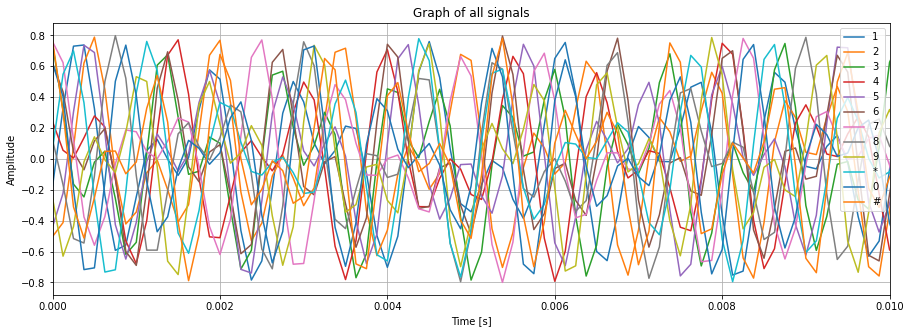

In [3]:
figure1=plt.figure(figsize = (15,5))
plt.plot(t, y1, label = "1")
plt.plot(t, y2, label = "2")
plt.plot(t, y3, label = "3")
plt.plot(t, y4, label = "4")
plt.plot(t, y5, label = "5")
plt.plot(t, y6, label = "6")
plt.plot(t, y7, label = "7")
plt.plot(t, y8, label = "8")
plt.plot(t, y9, label = "9")
plt.plot(t, ys, label = "*")
plt.plot(t, y0, label = "0")
plt.plot(t, yh, label = "#")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Graph of all signals")
plt.grid()
plt.legend()
plt.xlim([0,0.01])
plt.show()

#### Task-3  (4 points): 
Choose a single digit from the keypad and generate the corresponding signal for it 5 times, each time randomly choosing the phase shifts $\phi_1$ and $\phi_2$. Store each version as a wav-file and listen to it. Do you hear any difference between the signals?

In [4]:
# COMPLETE TASK-3 HERE
five_signal_list = []
for i in range(5):
    y1 = A*np.cos(2*np.pi*f1[0]*t+np.random.choice(all_phi)) + A*np.cos(2*np.pi*f2[0]*t+np.random.choice(all_phi))
    wavfile.write("5y{}.wav".format(i+1), fs, y1)
    five_signal_list.append(y1)

**YOUR ANSWER GOES HERE**

 No, I don't hear any difference between the signals.

#### Task-4  (5 points): 
Graph the first 10 milliseconds of all 5 signals generated in Task 3. Describe similarities and differences.

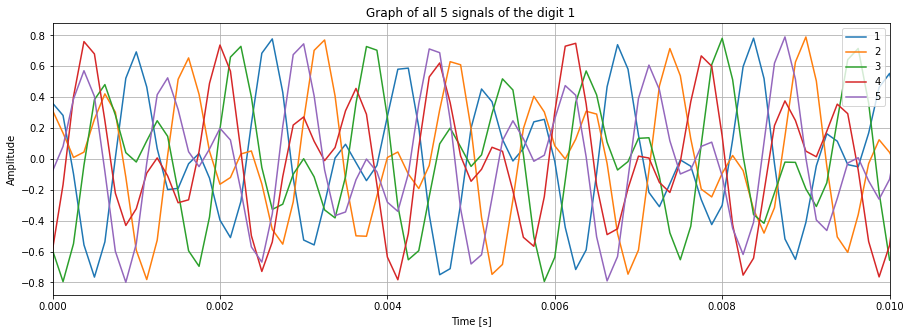

In [5]:
# COMPLETE TASK-4 HERE
figure1=plt.figure(figsize = (15,5))
plt.plot(t, five_signal_list[0], label = "1")
plt.plot(t, five_signal_list[1], label = "2")
plt.plot(t, five_signal_list[2], label = "3")
plt.plot(t, five_signal_list[3], label = "4")
plt.plot(t, five_signal_list[4], label = "5")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Graph of all 5 signals of the digit 1")
plt.grid()
plt.legend()
plt.xlim([0,0.01])
plt.show()

**YOUR ANSWER GOES HERE**


Note: The observations below are for the graphs we got after running the code just before we made our observations. Since it generates random phi value the graphs may look diffrent everytime.

Differences:

 - All the graphs have different positions as they have different phase shifts.

 - Only Graph 1 touches the 0.8 amplitude in the given domain.

 - Graph 5 starts from the highest point and Graph 2 starts from the lowest point.

Similarities:

 - The highest possible amplitude is 0.8 (since 0.4 + 0.4 is 0.8).

 - They have the same pattern, but they are just not in sync since the have diffrent phi values.

#### Task-5 (5 points):
Create a data base containing 10000 signals. For each signal choose a digit (0-9) or the * and # key randomly, then select the corresponding frequencies. Each signal should have a length of 1 second and randomly chosen phase shifts. Store all 10000 signals in a file.

In Part-3 of this project you will use this project your will select a signal from this data base and then recover the number it corresponds to.

Before starting this task, discuss as a group in which format you want to store the signals. They should all be stored in a single file. It should be easy to select and extract a single signal again. You should also store the "ground truth", i.e. the number that corresponds to the signal. You need to describe the how you decided to store your signal below. You also need to upload the file with this part of the project.

In [6]:
# COMPLETE TASK-5 HERE

In [7]:
#Determinig the size of the data frame (which is supposed to be 10000, but our laptops don't have enough power to support such heavy calculations.) 
#Hence when running it on your end kindly change it to 10000 or any other desired number
size = int(100)

In [8]:
# creating a dataframe with all the digits and its frequencies. (we have used 10 instead of * and 11 instead of # to avoid errors)
digit = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0, 11]
f1 = [697, 697, 697, 770, 770, 770, 852, 852, 852, 941, 941, 941]
f2 = [1209, 1336, 1477, 1209, 1336, 1477, 1209, 1336, 1477, 1209, 1336, 1477]
digit_table = list(zip(digit,f1,f2))
df = pd.DataFrame(data = digit_table, columns=['digit', 'f1', 'f2'])
df

,digit,f1,f2
0,1,697,1209
1,2,697,1336
2,3,697,1477
3,4,770,1209
4,5,770,1336
5,6,770,1477
6,7,852,1209
7,8,852,1336
8,9,852,1477
9,10,941,1209


In [9]:
# Writing a for loop to generate the arrays for all the information needed to create a datarame
y_list = []
digit_list = []
f1_list = []
f2_list = []

for i in range(size):
    val = (df.sample())
    digit = int(val['digit'])
    f1 = int(val['f1'])
    f2 = int(val['f2'])
    y = A*np.cos(2*np.pi*f1*t+np.random.choice(all_phi)) + A*np.cos(2*np.pi*f2*t+np.random.choice(all_phi))
    y_list.append(y)
    digit_list.append(digit)
    f1_list.append(f1)
    f2_list.append(f2)

y_list = np.array(y_list)
digit_list = np.array(digit_list)
f1_list = np.array(f1_list)
f2_list = np.array(f2_list)
print(len(y_list ))
print(len(digit_list))
print(len(f1_list))
print(len(f2_list))

100
100
100
100


### Approach 1

In [10]:
# Creating the database of all the randomly generated signals in the form of a DataFrame with 8003 columns
y_name = []
for i in range(8000):
    y_name.append('y{}'.format(i+1))

y_list_df = pd.DataFrame(data = y_list, columns = y_name)
y_list_df.insert(0, "Digit", digit_list, True)
y_list_df.insert(1, "f1", f1_list, True)
y_list_df.insert(2, "f2", f2_list, True)
y_list_df.head()

,Digit,f1,f2,y1,y2,y3,y4,y5,y6,y7,...,y7991,y7992,y7993,y7994,y7995,y7996,y7997,y7998,y7999,y8000
0,1,697,1209,-0.120419,-0.163976,0.049633,0.418658,0.653887,0.514774,0.023346,...,0.408205,0.770016,0.702241,0.250148,-0.278982,-0.552069,-0.456734,-0.161366,0.051558,0.031992
1,1,697,1209,-0.069374,-0.321847,-0.274143,-0.082703,0.000846,-0.133197,-0.349265,...,0.259985,0.140301,-0.230882,-0.612728,-0.695967,-0.358515,0.217131,0.667339,0.716946,0.379699
2,4,770,1209,-0.320944,0.176819,0.654289,0.771709,0.423999,-0.168948,-0.620973,...,0.517673,0.443133,0.155823,-0.069272,-0.077444,0.048282,0.088424,-0.088919,-0.382926,-0.527508
3,1,697,1209,0.650034,0.317849,-0.250908,-0.697232,-0.738947,-0.380003,0.104167,...,-0.444908,-0.534687,-0.313351,-0.034452,0.060071,-0.055300,-0.183965,-0.100815,0.225239,0.575883
4,0,941,1336,0.071497,0.255474,0.268248,-0.041680,-0.474030,-0.619949,-0.259269,...,0.673043,0.705783,0.222909,-0.341949,-0.546835,-0.319830,0.038541,0.194855,0.103728,-0.004815


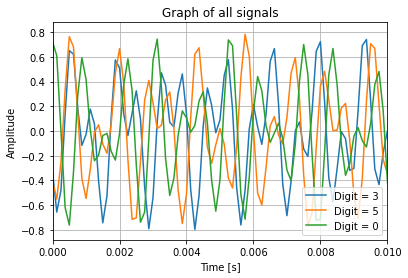

In [11]:
# Checking if the code works properly by creating graphs for three randomly selected digits from the database
a = random.randint(0,size)
b = random.randint(0,size)
c = random.randint(0,size)

plt.plot(t,y_list_df.loc[a, y_name], label = "Digit = {}".format(y_list_df['Digit'][a]))
plt.plot(t,y_list_df.loc[b, y_name], label = "Digit = {}".format(y_list_df['Digit'][b]))
plt.plot(t,y_list_df.loc[c, y_name], label = "Digit = {}".format(y_list_df['Digit'][c]))
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Graph of all signals")
plt.grid()
plt.legend()
plt.xlim([0,0.01])
plt.show()

In [12]:
# Exporting the database in csv format
y_list_df.to_csv('y_list_df.csv', index=False)

### Approach 2

This is the original approach. I found this more efficient instead of creating a database with 8003 columns. But since the CSV file generated from this converts the datatype - lists into datatype - string, data points are lost and hence we went with the approach 1 above. This is here just for extra insights on our group.

In [13]:
# Creating the database of all the randomly generated signals in the form of a DataFrame
digit_database = list(zip(digit_list, f1_list, f2_list, y_list ))
digit_database = np.array(digit_database)
df_database = pd.DataFrame(data = digit_database, columns=['Digit', 'f1', 'f2', 'y'])
df_database.head()

,Digit,f1,f2,y
0,1,697,1209,"[-0.12041909503014267, -0.1639763866839476, 0...."
1,1,697,1209,"[-0.06937423643347351, -0.3218473415726029, -0..."
2,4,770,1209,"[-0.32094387229065136, 0.17681889490099767, 0...."
3,1,697,1209,"[0.6500339552666677, 0.31784889234899244, -0.2..."
4,0,941,1336,"[0.07149738242112974, 0.2554738275781768, 0.26..."


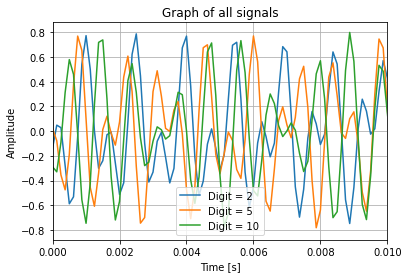

In [14]:
# Checking if the code works properly by creating graphs for three randomly selected digits from the database
d = random.randint(0, size)
f = random.randint(0, size)
g = random.randint(0, size)

plt.plot(t, df_database['y'][d], label = "Digit = {}".format(df_database['Digit'][d]))
plt.plot(t, df_database['y'][f], label = "Digit = {}".format(df_database['Digit'][f]))
plt.plot(t, df_database['y'][g], label = "Digit = {}".format(df_database['Digit'][g]))
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Graph of all signals")
plt.grid()
plt.legend()
plt.xlim([0,0.01])
plt.show()

In [15]:
#Not working yet
#df_database.to_csv('df_database.csv')

**YOUR ANSWER GOES HERE**

The way we decided to store the necessary information was in the form of a csv file. We decide to create a dataframe with all the digits("Ground Truth") with its respective frequencies (i.e. f1 and f2). After that, we calculated and stored the corresponding list of y values for that digit. That way we got a dataframe with four columns: Digit; f1; f2; y. This makes it is easier to recall and organize the data in further parts of the project, as we can choose specific rows for testing. All of these choices were made in order to make a more efficient and easier to understand dataframe that will eventually help us skip a lot of unnecessary code when Part 3 of the project is done.